In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn import svm
from pylab import *
import time


使用keys()方法来看一下数据集的详情:
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
shape of X:
(1797, 64)
shape of y
(1797,)
The classification
[0 1 2 3 4 5 6 7 8 9]
One of the pictures:
AxesImage(54,36;334.8x217.44)


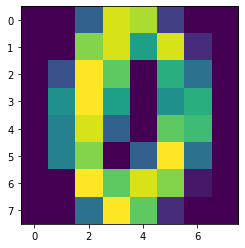

In [2]:
# 手写数字数据集，封装好的对象，可以理解为一个字段
digits = datasets.load_digits()
print('使用keys()方法来看一下数据集的详情:')
print(digits.keys())
X = digits.data
y = digits.target
print('shape of X:')
print(X.shape)
print('shape of y')
print(y.shape)
# 标签分类
print('The classification')
print(digits.target_names)
# 去除某一个具体的数据，查看其特征以及标签信息
some_digit = X[666]
print('One of the pictures:')
print(imshow(some_digit.reshape(8,8)))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print('The shape of train data after division:' )
print(X_train.shape)
print(y_train.shape)
print('The shape of test data after division:' )
print(X_test.shape)
print(y_test.shape)

The shape of train data after division:
(1078, 64)
(1078,)
The shape of test data after division:
(719, 64)
(719,)


In [8]:
def svm_PCA(X_train,y_train,X_test,y_test,vac_PCA,time_PCA):
    D=np.array(list(range(2,X_test.shape[1])))
    for d in D:
        start=time.perf_counter() 
        pca = PCA(n_components=d)
        #####We should do PCA on the all datasets!!!!!!!!####
        X_PCA=pca.fit_transform(np.r_[X_train,X_test])
        X_train_PCA,X_test_PCA=X_PCA[:X_train.shape[0],:],X_PCA[X_train.shape[0]:,:] 
        model = svm.SVC(kernel='linear', C=1, gamma=1,decision_function_shape='ovr') 
        #There is various option associated with it, like changing kernel, gamma and C value. 
        #Train the model using the training sets and check score
        model.fit(X_train_PCA, y_train)
        model.score(X_train_PCA, y_train)
        #Predict Output
        predicted= model.predict(X_test_PCA)    
        vac_PCA.append(np.sum(predicted==y_test)/len(y_test))
        end=time.perf_counter() 
        time_PCA.append(end-start)
    plt.xlabel('The number of features')
    plt.ylabel('PCA vaccuracy')
    plt.plot(D,vac_PCA,color='black',marker='^')
    plt.show()
    plt.xlabel('The number of features')
    plt.ylabel('PCA time')
    plt.plot(D,time_PCA,color='red',marker='o')
    plt.show()

In [4]:
def svm_NMF(X_train,y_train,X_test,y_test,vac_NMF,time_NMF):
    D=np.array(list(range(2,64)))    
    for d in D:
        start=time.perf_counter() 
        mode_NMF=NMF(d,init='nndsvda', tol=5e-3,max_iter=2000)
        #mode_NMF.fit(np.r_[X_train,X_test])
        #X_NMF=mode_NMF.transform(np.r_[X_train,X_test])
        #X_train_NMF,X_test_NMF=X_NMF[:X_train.shape[0],:],X_NMF[X_train.shape[0]:,:] 
        mode_NMF.fit(X_train)
        mode_NMF.fit(X_test)
        X_train_NMF=mode_NMF.transform(X_train)
        X_test_NMF=mode_NMF.transform(X_test)
        model = svm.SVC(kernel='linear', C=1, gamma=1,decision_function_shape='ovr') 
        model.fit(X_train_NMF, y_train)
        model.score(X_train_NMF, y_train)
        #Predict Output
        predicted= model.predict(X_test_NMF)
        vac_NMF.append(np.sum(predicted==y_test)/len(y_test))
        end=time.perf_counter() 
        time_NMF.append(end-start)
    plt.xlabel('The number of features')
    plt.ylabel('NMF accuracy')
    plt.plot(D,vac_NMF,color='black',marker='^')
    plt.show()
    plt.xlabel('The number of features')
    plt.ylabel('NMF time')
    plt.plot(D,time_NMF,color='red',marker='o')
    plt.show()

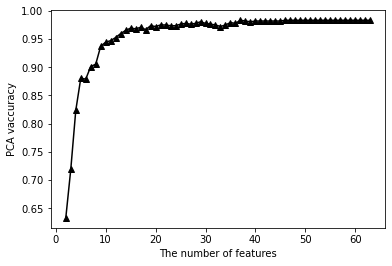

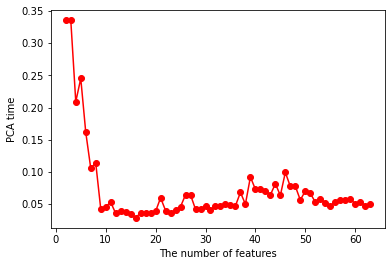

In [9]:
vac_PCA=[]
time_PCA=[]
svm_PCA(X_train,y_train,X_test,y_test,vac_PCA,time_PCA)   

In [7]:
maxi=0
count=0
for i in range(len(vac_PCA)):
    if np.abs(vac_PCA[i]-time_PCA[i])>maxi:
        maxi=np.abs(vac_PCA[i]-time_PCA[i])
        count=i
print('The best result is {:.2f}% vaccuracy,time of {}s at {} dimensions' .format(vac_PCA[count]*100,time_PCA[count],count+1))

The best result is 97.36% vaccuracy,time of 0.04929945800000013s at 18 dimensions


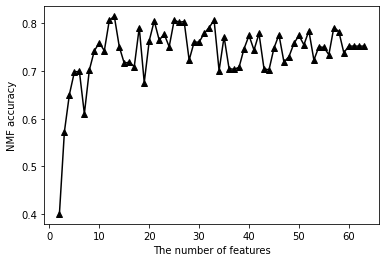

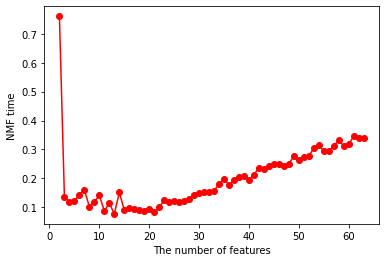

In [6]:
vac_NMF=[]
time_NMF=[]
svm_NMF(X_train,y_train,X_test,y_test,vac_NMF,time_NMF)

In [7]:
maxi=0
count=0
for i in range(len(vac_PCA)):
    if np.abs(vac_NMF[i]-time_NMF[i])>maxi:
        maxi=np.abs(vac_NMF[i]-time_NMF[i])
        count=i
print('The best result is {:.2f}% vaccuracy,time of {}s at {} dimensions' .format(vac_NMF[count]*100,time_NMF[count],count+1))

The best result is 40.06% vaccuracy,time of 0.7612693999544717s at 1 dimensions
